In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [53]:
dataset_train = pd.read_csv("trainset.csv")

In [54]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
5,2013-01-09,363.769043,366.789398,361.945892,366.675140,366.675140,4075700
6,2013-01-10,369.014923,370.092896,364.380066,368.344269,368.344269,3695100
7,2013-01-11,368.602600,368.816193,365.771027,367.604095,367.604095,2587000
8,2013-01-14,366.118744,368.701935,358.841095,359.288177,359.288177,5765000
9,2013-01-15,357.340851,365.125214,353.749207,360.122742,360.122742,7906300


In [55]:
trainset = dataset_train.iloc[:,1:2].values

In [56]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [57]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [58]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [59]:
x_train = []
y_train = []

In [60]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])


In [61]:
x_train = np.array(x_train)
y_train=np.array(y_train)

In [62]:
x_train.shape

(1199, 60)

In [63]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [64]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [65]:
model.add(Dropout(0.2))


In [66]:
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))


In [67]:
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

In [68]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [69]:
model.add(Dense(units = 1))

In [70]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [71]:
model.fit(x_train,y_train,epochs = 30, batch_size = 32)

Epoch 1/30
38/38 [==============================] - 9s 15ms/step - loss: 0.0294
Epoch 2/30
38/38 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 3/30
38/38 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 4/30
38/38 [==============================] - 1s 19ms/step - loss: 0.0036
Epoch 5/30
38/38 [==============================] - 1s 19ms/step - loss: 0.0037
Epoch 6/30
38/38 [==============================] - 1s 20ms/step - loss: 0.0035
Epoch 7/30
38/38 [==============================] - 1s 17ms/step - loss: 0.0037
Epoch 8/30
38/38 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 9/30
38/38 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 10/30
38/38 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 11/30
38/38 [==============================] - 1s 15ms/step - loss: 0.0031
Epoch 12/30
38/38 [==============================] - 1s 13ms/step - loss: 0.0029
Epoch 13/30
38/38 [==================

In [72]:
dataset_test =pd.read_csv("testset.csv")

In [73]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [74]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [75]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [76]:
inputs = inputs.reshape(-1,1)

In [77]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [78]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [79]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [80]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [81]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [83]:
predicted_price = model.predict(x_test)

4/4 [==============================] - 2s 8ms/step


In [84]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1068.1306],
       [1069.6936],
       [1070.5498],
       [1071.1149],
       [1071.819 ],
       [1073.0323],
       [1075.0155],
       [1077.7471],
       [1081.136 ],
       [1084.9785],
       [1089.2836],
       [1093.9785],
       [1098.9729],
       [1104.1324],
       [1109.3379],
       [1114.6423],
       [1120.2119],
       [1126.0837],
       [1132.203 ],
       [1138.439 ],
       [1144.539 ],
       [1150.2706],
       [1155.3796],
       [1159.3479],
       [1161.5494],
       [1161.1084],
       [1157.9851],
       [1152.3289],
       [1144.2455],
       [1134.2899],
       [1123.1486],
       [1111.5685],
       [1100.4779],
       [1090.7294],
       [1082.9363],
       [1077.5402],
       [1074.7666],
       [1074.5251],
       [1076.6125],
       [1080.7708],
       [1086.4576],
       [1092.9302],
       [1099.035 ],
       [1104.0193],
       [1107.6663],
       [1109.9462],
       [1111.1963],
       [1111.9806],
       [1113.0208],
       [1114.8958],


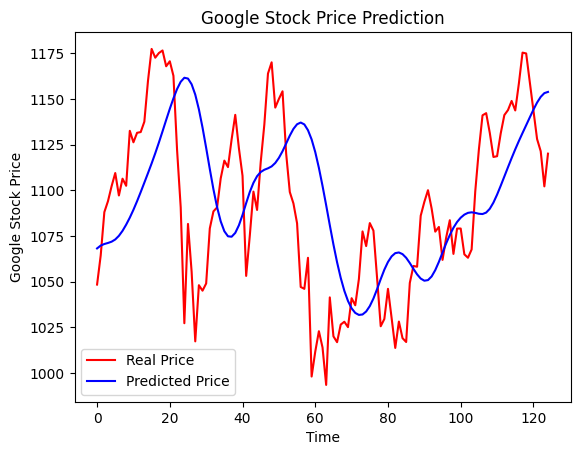

In [85]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()